In [ ]:
from google.colab import files
files.upload()

Saving LR_X_Test.csv to LR_X_Test (1).csv
Saving LR_X_Train.csv to LR_X_Train (1).csv
Saving LR_Y_test.csv to LR_Y_test (1).csv
Saving LR_Y_Train.csv to LR_Y_Train (1).csv


{'LR_X_Test (1).csv': b'x\r\n-1.8779444140653532\r\n-0.869031915913438\r\n-2.53018242461237\r\n2.7602054471376105\r\n0.5910001292584074\r\n-1.2956004711033724\r\n-0.19682800607291293\r\n0.2920773580754287\r\n-0.8216931030467899\r\n-1.5015663386613785\r\n-0.17875424424894285\r\n0.07219695582142459\r\n-0.5046278956340836\r\n0.8011391202013578\r\n0.0983822392118015\r\n-0.16362305832026347\r\n0.2826603073765432\r\n1.2912053951699345\r\n2.154094449461701\r\n0.24045678041458773\r\n-0.4321556223964801\r\n0.22920336743153535\r\n-0.6980451204787529\r\n-1.8714764848963226\r\n0.8171942874098141\r\n1.3208829066998986\r\n1.8817549911074853\r\n0.1006501375000681\r\n0.3838936574929074\r\n-1.188459787190205\r\n1.584903785178254\r\n0.7518021927556989\r\n-0.2849795659847709\r\n1.4414378792268827\r\n2.033068073954715\r\n-1.1580671989694469\r\n-1.9224837539781199\r\n0.08870020091638904\r\n-0.5498836494895158\r\n0.2875576503663561\r\n0.4149709330681099\r\n0.027789975056096965\r\n0.2558937639523236\r\n1.662

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
from sklearn.metrics import r2_score

In [ ]:
X_train=pd.read_csv("LR_X_Train.csv")
X_test=pd.read_csv("LR_X_Test.csv")
Y_train=pd.read_csv("LR_Y_Train.csv")
Y_test=pd.read_csv("LR_Y_test.csv")

Text(0, 0.5, 'Performance at endsem')

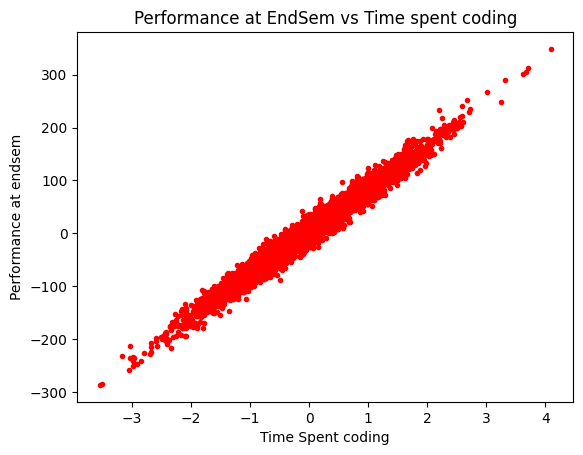

In [ ]:
plt.scatter(X_train['x'],Y_train['y'],marker='.',c='r')
plt.title("Performance at EndSem vs Time spent coding")
plt.xlabel('Time Spent coding')
plt.ylabel('Performance at endsem')

In [ ]:
Y=Y_train['y'].to_numpy()
Y

array([-9.11011171e-02, -5.34677208e+01,  7.54570088e+01, ...,
       -3.49832749e+01,  1.45206092e+02, -1.71244939e+01])

In [ ]:
w=0
b=0
h=np.dot(X_train,w)+b
h

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
def compute_cost(x,y,w,b):
  m=x.shape[0]
  Y=y['y'].to_numpy()
  h=np.dot(x,w)+b
  total_cost=0
  for i in range (m):
        total_cost= total_cost+ (h[i]-Y[i])**2
  total_cost= total_cost/(2*m)
  return total_cost

In [ ]:
X_train

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043
...,...
3745,-0.100992
3746,1.349197
3747,-0.305164
3748,1.675833


In [ ]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    Y=y['y'].to_numpy()
    X=x['x'].to_numpy()
    h=np.dot(x,w)+b
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw+=(h[i]-Y[i])*X[i]
        dj_db+=(h[i]-Y[i])
    dj_dw=dj_dw/m;
    dj_db=dj_db/m

    return dj_dw, dj_db

In [ ]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, Y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: [-79.05747612] [-0.4914279]


In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # number of training examples
    m = len(x)
    Y=y['y'].to_numpy()
    X=x['x'].to_numpy()
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

In [ ]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(X_train ,Y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost  3225.68   
Iteration  150: Cost   257.84   
Iteration  300: Cost   104.00   
Iteration  450: Cost    95.93   
Iteration  600: Cost    95.50   
Iteration  750: Cost    95.48   
Iteration  900: Cost    95.48   
Iteration 1050: Cost    95.48   
Iteration 1200: Cost    95.48   
Iteration 1350: Cost    95.48   
w,b found by gradient descent: [80.5435983] [3.72797161]


In [ ]:
m = X_test.shape[0]
predicted = np.zeros(m)
X=X_test['x'].to_numpy()
for i in range(m):
    predicted[i] = w * X[i] + b

In [ ]:
Y_test

,y
0,-146.215555
1,-67.172405
2,-197.315078
3,217.159839
4,47.213662
...,...
1245,-12.254711
1246,73.946699
1247,10.940575
1248,-20.871013


Text(0.5, 0, 'Population of City in 10,000s')

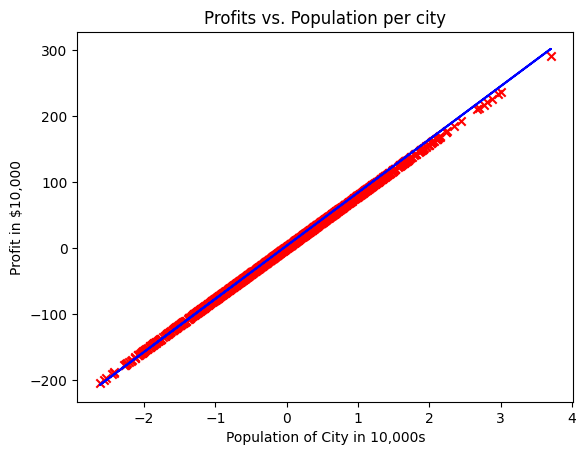

In [ ]:
# Plot the linear fit
plt.plot(X_test['x'], predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(X_test['x'], Y_test, marker='x', c='r')

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [ ]:
r2=r2_score(Y_test,predicted)
r2

0.9980110150870005